In [1]:
import pandas as pd
import math
def rmnan(arr):
    cleanedset = arr
    rmarr = list()
    for i in range(len(cleanedset)):
        if math.isnan(cleanedset[i]):
            rmarr.append(i-len(rmarr))
    for i in rmarr:
        cleanedset.pop(i)
    return cleanedset

def mean(arr):
    return sum(arr)/len(arr)

def median(arr):
    arr = sort(arr)
    return (arr[math.ceil(len(arr)/2)]+arr[math.floor(len(arr)/2)])/2

def vartype(arr):
    catquant = list()
    for i in range(len(arr[0])):
        if(type(arr[0][i]) == int):
            catquant.append("Quantitative")
        elif(type(arr[0][i]) == float):
            catquant.append("Quantitative")
        else:
            catquant.append("Categorical")
    return catquant

def stdev(arr):
    avg = mean(arr)
    total = 0;
    for i in arr:
        total += math.pow(i-avg,2)
    return math.sqrt(total/(len(arr)-1))

def IQR(arr):
    arr = sort(arr)
    q1 = (arr[math.ceil(len(arr)/4)]+arr[math.floor(len(arr)/4)])/2
    q3 = (arr[math.ceil(3*len(arr)/4)]+arr[math.floor(3*len(arr)/4)])/2
    return q3-q1;

def split(arr):
    arr1 = list()
    arr2 = list()
    for i in range(0,int(len(arr)/2)):
        arr1.append(arr[i])
    for i in range(int(len(arr)/2),len(arr)):
        arr2.append(arr[i])
    return arr1, arr2

def merge(arr1, arr2):
    for i in arr2:
        for j in range(len(arr1)):
            if(arr1[j]>i):
                arr1.insert(j,i)
    return arr1

def sort(arr):
    if len(arr) == 1:
        return arr
    a, b = split(arr)
    return merge(sort(a),sort(b))

def favstats(arr):
    q1 = (arr[math.ceil(len(arr)/4)]+arr[math.floor(len(arr)/4)])/2
    q3 = (arr[math.ceil(3*len(arr)/4)]+arr[math.floor(3*len(arr)/4)])/2
    med = median(arr)
    return [min(arr),q1,med,q3,max(arr)]

def quantile(arr,num=4):
    arr = sort(arr)
    out = list();
    for i in range(num):
        print(arr[int(len(arr)*i/num)])
        out.append(arr[int(len(arr)*i/num)])
    out.append(arr[len(arr)-1])
    return out

# Part 2: Exploratory Data Analysis: Government Shutdowns

In [2]:
shutdown = pd.read_csv("shutdown_all.csv")
shutdown

,Year,President,MonthStart,Length
0,2018,Trump,Dec,36
1,2018,Trump,Jan,3
2,2018,Trump,Feb,1
3,2013,Obama,Oct,16
4,1995,Clinton,Dec,21
5,1995,Clinton,Nov,5
6,1990,HWBush,Oct,3
7,1987,Reagan,Dec,1
8,1986,Reagan,Oct,1
9,1984,Reagan,Oct,1


In [3]:
print(shutdown.columns)
print(vartype(shutdown.values.tolist()))

Index(['Year', 'President', 'MonthStart', 'Length'], dtype='object')
['Quantitative', 'Categorical', 'Categorical', 'Quantitative']


In [4]:
print(mean(shutdown.Length))
print(stdev(shutdown.Length))

7.904761904761905
8.86512696978877


In [5]:
print(median(shutdown.Length))
print(IQR(shutdown.Length))

1.0
1.5


In [6]:
len(shutdown)

21

array([[<AxesSubplot:title={'center':'Length'}>]], dtype=object)

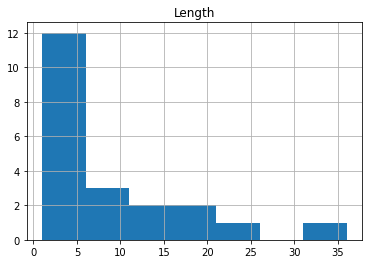

In [7]:
shutdown.hist(column="Length",bins=7)

<AxesSubplot:>

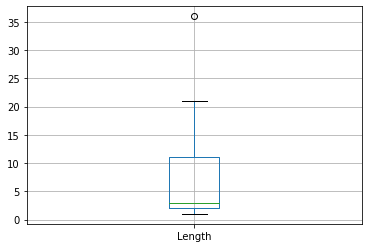

In [8]:
shutdown.boxplot(column="Length")

In [9]:
favstats(shutdown.Length)

[1, 4.0, 1.0, 14.5, 36]

In [10]:
quantile(shutdown.Length)

1
1
1
2


[1, 1, 1, 2, 36]

# Part 3: Curry

In [11]:
curry = pd.read_csv("curry2015.csv")
curry

,Game,Point
0,1,40.0
1,2,25.0
2,3,53.0
3,4,30.0
4,5,31.0
...,...,...
77,78,21.0
78,79,27.0
79,80,17.0
80,81,37.0


In [12]:
points = rmnan(curry.Point.tolist())
data = []
for i in range(len(points)):
    data.append([curry.Game.tolist()[i],points[i]])
curry = pd.DataFrame(data=data,columns=["Game","Points"])
curry

,Game,Points
0,1,40.0
1,2,25.0
2,3,53.0
3,4,30.0
4,5,31.0
...,...,...
74,75,21.0
75,76,27.0
76,77,17.0
77,78,37.0


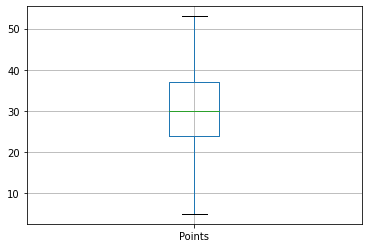

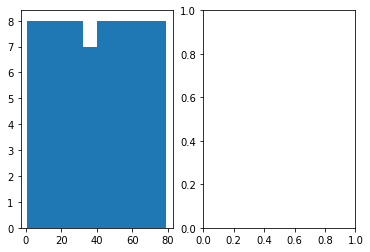

In [13]:
curry.boxplot(column="Points")
try:
    curry.hist(columns='Points',bins=10)
except:
    print("")

In [14]:
len(curry)

79

In [15]:
mean(curry.Points)

30.063291139240505

In [16]:
stdev(curry.Points)

9.76432776599821

In [17]:
max(curry.Points)

53.0

# Part 4: Championship Droughts

In [18]:
champs = pd.read_csv("SuperBowl_lastwin.csv")
champs

,Team,LastYearWon,YearsSinceWon
0,Arizona Cardinals,NaN,53
1,Atlanta Falcons,NaN,53
2,Buffalo Bills,NaN,53
3,Detroit Lions,NaN,53
4,Los Angeles Chargers,NaN,53
5,Minnesota Vikings,NaN,53
6,Tennessee Titans,NaN,53
7,Cincinnati Bengals,NaN,51
8,Cleveland Browns,NaN,50
9,New York Jets,1968.0,50


<AxesSubplot:>

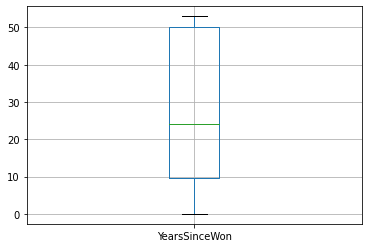

In [19]:
champs.boxplot(column="YearsSinceWon")

In [20]:
median(champs.YearsSinceWon)

1.0

In [21]:
IQR(champs.YearsSinceWon)

5.0

In [22]:
favstats(champs.YearsSinceWon)

[0, 50.0, 1.0, 9.0, 53]

<AxesSubplot:xlabel='0', ylabel='1'>

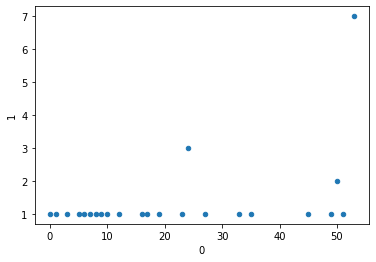

In [23]:
D = dict()
for r in champs.YearsSinceWon.tolist():
    try:
        D[r] += 1;
    except:
        D[r] = 1;
lst = list()
for k,v in D.items():
    lst.append([k,v])

df = pd.DataFrame(lst)

df.plot.scatter(0,1)